## 1. 试编写函数实现Newton插值，要求能输出插值多项式。对函数 $f(x)=\frac{1}{1+4x^2}$,在区间$[-5,5]$ 上实现10次多项式插值。
## (1)输出插值多项式；
## (2)在区间$[-5,5]$ 内均匀插入99个节点，计算这些节点上函数$f(x)$的近似值，并在统一张图中画出原函数和插值多项式的图形。
## (3)观察龙格现象，计算插值各结点上的误差，并画出误差图

### 解：编写两个函数.
### 第一个函数 newtonInterpExp 的输入：待插值的函数，插值次数，和未知数名称；
### 输出：插值多项式（未化简的，便于观察算法是否正确）.
### 第二个函数 getInterpValue 的输入：插值表达式，插值点，和未知数名称；
### 输出：插值得到的函数值.
### 代码如下

In [1]:
using SymEngine
using Plots

interval_len=10 ./100 #小区间长度，插入99个点后区间被分成100份
region=collect(-5:interval_len:5)
x=[-5,5]
interp_pow=10
varname="x"
f(x) = 1 ./(1 .+4 .*x.^2)

f (generic function with 1 method)

In [2]:
function newtonInterpExp(fun_nt,x,power_nt,varname)
    lowerbound=x[1]
    upperbound=x[2]
    interp_len=10 ./(power_nt) #用于获得插值多项式的小区间长度，10次插值需要把区间分成10份
    x_interp=collect(lowerbound:interp_len:upperbound)
    f_interp=fun_nt(x_interp)
    #println(x_interp)
    var=symbols(varname)
    deri=[(f_interp[i+1]-f_interp[i])/(x_interp[i+1]-x_interp[i]) for i in range(1,stop=power_nt)]#前向差商
    #println("deri: ",deri)
    coef=deri[1]
    ex_prod=var-x_interp[1]
    ex_nt=f_interp[1]+coef*ex_prod
    #println(ex_nt)
    for p=2:power_nt
        deri=[(deri[i+1]-deri[i])/(x_interp[i+p]-x_interp[i]) for i in range(1,stop=power_nt-p+1)]
        coef=deri[1]
        ex_prod*= var-x_interp[p]     
        ex_nt+=coef*ex_prod
        #println("...\n",deri,"gugugu\n",expand(ex_nt))
    end
    return ex_nt
end

function getInterpValue(ex_interp,region, varname)
    return [convert(Float64,subs(ex_interp,symbols(varname)=>i)) for i in region]
end

getInterpValue (generic function with 1 method)

### 得到插值多项式如下

In [3]:
expression=newtonInterpExp(f,x,interp_pow,varname);
expression

0.0099009900990099 + 0.00307939317840308*(4.0 + x)*(5.0 + x) + 0.00233255073091998*(3.0 + x)*(4.0 + x)*(5.0 + x) + 0.00313460721148549*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x) + 0.00320822592226203*(1.0 + x)*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x) - 0.00507426650699802*x*(1.0 + x)*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x) + 0.0028269584938193*x*(1.0 + x)*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x)*(-1.0 + x) - 0.000979516320226862*x*(1.0 + x)*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x)*(-1.0 + x)*(-2.0 + x) + 0.000247978815247307*x*(1.0 + x)*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x)*(-1.0 + x)*(-2.0 + x)*(-3.0 + x) - 4.95957630494614e-05*x*(1.0 + x)*(2.0 + x)*(3.0 + x)*(4.0 + x)*(5.0 + x)*(-1.0 + x)*(-2.0 + x)*(-3.0 + x)*(-4.0 + x) + 0.00548362528560548*(5.0 + x)

### 化简得

In [4]:
exp_simp = expand(expression)
exp_simp

1.0 + 4.97865637605344e-16*x - 1.14328404835103*x^2 - 1.94289029309402e-16*x^3 + 0.392014985282312*x^4 - 0.0514215070767196*x^6 + 1.30104260698261e-18*x^7 + 0.00274016590848274*x^8 - 4.95957630494614e-05*x^10

### 得到区间$[-5,5]$ 边界及其间99个节点上的插值 y_interp，并绘图如下

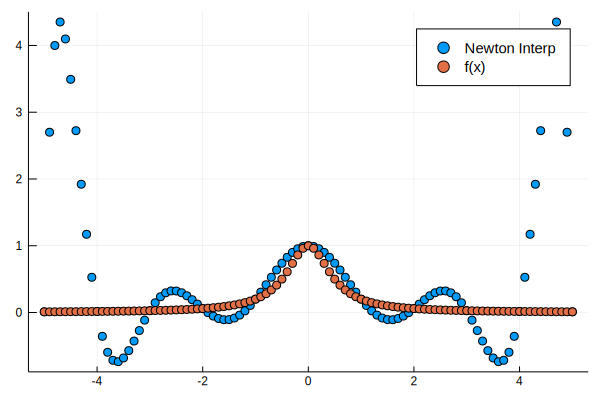

In [5]:
y_interp=getInterpValue(exp_simp,region, varname)
y_true=f(region)
plot(region,y_interp,label="Newton Interp",legendfontsize =(10),seriestype=:scatter)
plot!(region,y_true,label="f(x)",legendfontsize =(10),seriestype=:scatter)

### 显然存在龙格现象，边界处发散, 使用真值减去近似值获得误差，作图如下

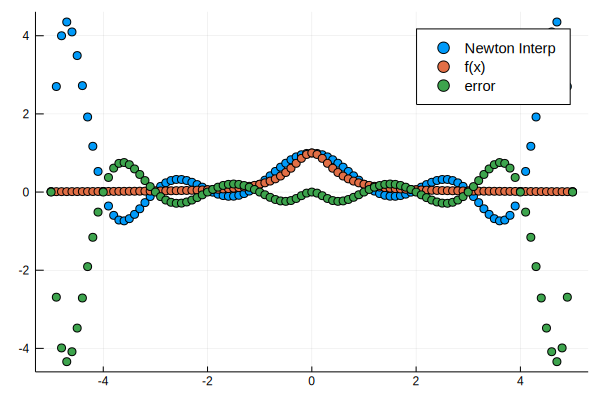

In [6]:
y_interp=getInterpValue(exp_simp,region, varname)
y_true=f(region)
err=y_true-y_interp
plot(region,y_interp,label="Newton Interp",legendfontsize =(10),seriestype=:scatter)
plot!(region,y_true,label="f(x)",legendfontsize =(10),seriestype=:scatter)
plot!(region,err,label="error",legendfontsize =(10),seriestype=:scatter)